

# HW 2: Analyzing IMDb Data

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

The csv data can be downloaded from https://drive.google.com/open?id=12oQVUx8gGsdruEi4iJB-KFvxLt3znK-l for your offline use purpose

## Part 1

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'12oQVUx8gGsdruEi4iJB-KFvxLt3znK-l'}) # replace the id with id of file you want to access
downloaded.GetContentFile('imdb_1000.csv') 

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [0]:
movies = pd.read_csv('imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [0]:
# Answer:

movies.shape ## It has 976 rows and 6 coulmns

(979, 6)

#### Check the data type of each column.

In [0]:
# Answer:

#movies.info() ## This gives data type of each column
# or

movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [0]:
# Answer:

movies[['duration']].mean() ## The mean duration was 120.979

duration    120.979571
dtype: float64

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [0]:
# Answer:
moviee = movies.sort_values(['duration'])
moviee

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


In [0]:
print('Shortest movie with respect to duration')
moviee.head(1)

Shortest movie with respect to duration


,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [0]:
print('Longest movie with respect to duration')
moviee.tail(1)

Longest movie with respect to duration


,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

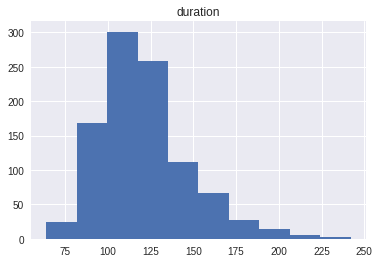

In [0]:
# Answer:

movies.hist(column = ['duration'],bins = 10)
plt.show()

#### Use a box plot to display that same data.

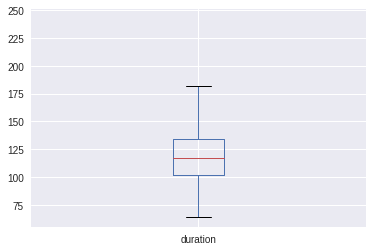

In [0]:
# Answer:

movies.boxplot(column = ['duration'],return_type = 'axes')
plt.show()

## Part 2

#### Count how many movies have each of the content ratings.

In [0]:
# Answer:

movies['content_rating'].unique()

movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

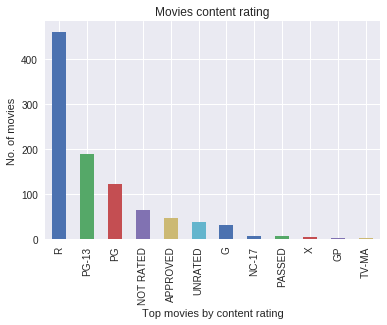

In [0]:
# Answer: 

movies.content_rating.value_counts().plot(kind='bar')
plt.xlabel('Top movies by content rating');
plt.ylabel("No. of movies");
plt.title("Movies content rating");


#temp = dataframe[column].value_counts()
#ax =temp.plot(kind='bar',title ='something')
##ax.set_xlabel('something')
#ax.set_ylabel('something')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [0]:
# Answer:

movies['content_rating'] = movies['content_rating'].replace({'NOT RATED': 'UNRATED','APPROVED':'UNRATED','PASSED':'UNRATED','GP':'UNRATED' }) 
movies.content_rating.value_counts()  

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [0]:
# Answer:

movies['content_rating'] = movies['content_rating'].replace({'X':'NC-17','TV-MA':'NC-17'})

movies.content_rating.value_counts()



R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [0]:
# Answer:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [0]:
# Answer:

movies['content_rating'].fillna('reasonable', inplace=True)

movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [0]:
# Answer:

x = movies.loc[movies['duration'] >= 120, 'star_rating'].mean()

y = movies.loc[movies['duration'] < 120, 'star_rating'].mean()

print('''The  average star rating for movies shorter than 2 hours is {:.4f} and 
      average star rating for movies longer than 2 hours is  {:.4f}''' .format(y,x))

The  average star rating for movies shorter than 2 hours is 7.8387 and 
      average star rating for movies longer than 2 hours is  7.9489


#### Use a visualization to detect whether there is a relationship between duration and star rating.

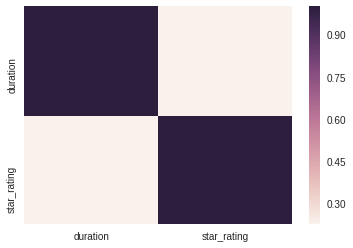

In [0]:
sns.heatmap(movies[['duration','star_rating']].corr())

#### Calculate the average duration for each genre.

In [0]:
# Answer:

movies.groupby('genre', as_index=False)['duration'].mean() ## Without as_index=False, it returns a Series instead

,genre,duration
0,Action,126.485294
1,Adventure,134.840000
2,Animation,96.596774
3,Biography,131.844156
4,Comedy,107.602564
5,Crime,122.298387
6,Drama,126.539568
7,Family,107.500000
8,Fantasy,112.000000
9,Film-Noir,97.333333


## Part 3

#### Visualize the relationship between content rating and duration.

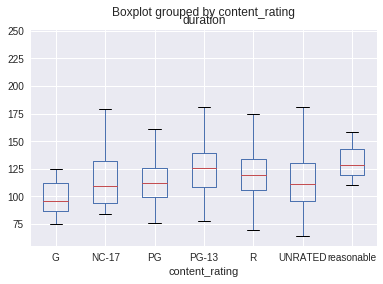

In [0]:
# Answer:
movies.boxplot('duration','content_rating')

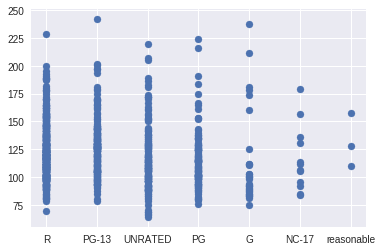

In [0]:
# Answer:

movies.content_rating.value_counts()

plt.scatter(movies['content_rating'],movies['duration'])
plt.show()


In [0]:
#sns.heatmap(movies[['content_rating','duration']].corr())


#### Determine the top rated movie (by star rating) for each genre.

In [0]:
# Answer:

dataframe_sorted = movies.sort_values(['star_rating'], ascending=False)
data = dataframe_sorted.groupby('genre').head(1)
data

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
38,8.6,Rear Window,UNRATED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."


In [0]:
movies.groupby('genre')['title','star_rating'].first()

,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Life Is Beautiful,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [0]:
# Answer:

#movies.title.value_counts()  ## Gives count of duplicates

movies[movies.duplicated(['title'], keep=False)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,reasonable,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [0]:
movies[movies['title'].duplicated() == True] ## Shows what are actual duplicates


,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,reasonable,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [0]:
# Answer:

movie_type = ['Animation','Horror','Mystery','Drama','Comedy','Action','Crime','Biography','Adventure']
movies[movies.genre.isin(movie_type)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [0]:
# Answer:


movie_count = movies.genre.value_counts()
movie_type_count=movies.genre.value_counts()[movie_count>=10].index
movies[movies.genre.isin(movie_type_count)].groupby('genre')['star_rating'].mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [0]:
# Answer:
movie_count = movies.genre.value_counts()
movie_count = (movie_count >=10)
movieMeans = movies.groupby('genre').star_rating.mean()
movieMeans[movie_count]



genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [0]:
# Answer:
movies.groupby('genre')['star_rating'].mean()[movies['genre'].value_counts()>=10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!

In [0]:
def repp(string):
    return string.replace(["[","]","u'"],"")[:-1]
    
movies_series = movies['actors_list'].apply(repp)

actors_list = []
for movie_actors in movies_series:
    actors_list.append([e.strip() for e in movie_actors.split(',')])
    
actor_dict = {}
for actor in actors_list:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] = 1


sorted_by_value = sorted(actor_dict.items(), key=lambda kv: kv[1],reverse=True)
sorted_by_value

Which actors acted mostly in the movies




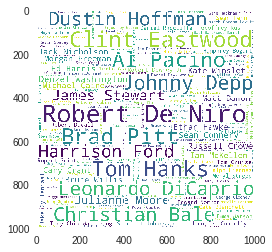

In [0]:
   import matplotlib.pyplot as plt
tpDict=dict(sorted_by_value)
from PIL import Image
from wordcloud import WordCloud
wc=WordCloud(background_color="white",width=1000,height=1000,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(tpDict)
plt.imshow(wc)
plt.show()

Top 20 Actors based on frequency

In [0]:
from itertools import islice

k=dict(sorted_by_value)
top20 = list(islice(k.items(),20))
for x in top20:
    print(x[0],x[1])

Robert De Niro 18
Clint Eastwood 14
Brad Pitt 14
Tom Hanks 14
Al Pacino 13
Johnny Depp 12
Christian Bale 11
Leonardo DiCaprio 11
Dustin Hoffman 11
Harrison Ford 10
James Stewart 10
Julianne Moore 10
Denzel Washington 10
Jack Nicholson 9
Russell Crowe 9
Sean Connery 9
Ed Harris 9
Ethan Hawke 9
Morgan Freeman 8
Ian McKellen 8


Wordcloud for High frequency actors(Top 20)

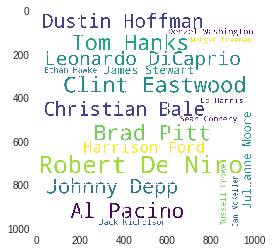

In [0]:
import matplotlib.pyplot as plt
tpDict=dict(top20)
from PIL import Image
from wordcloud import WordCloud
wc=WordCloud(background_color="white",width=1000,height=1000,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(tpDict)
plt.imshow(wc)
plt.show()